<a href="https://colab.research.google.com/github/augustodarruda/me904-trabalho1/blob/main/MNIST_LogisticClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn import metrics

In [16]:
X = np.array(pd.read_csv("https://raw.githubusercontent.com/matcarvalho13/P1/main/imageMNIST_att.csv", header=None, low_memory=False)) # leitura dos dados
y = np.array(pd.read_csv("https://raw.githubusercontent.com/matcarvalho13/P1/main/labelMNIST_att.csv", header=None, low_memory=False)) # leitura dos dados

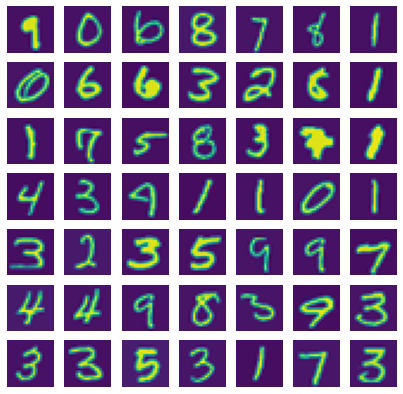

In [17]:
# Visualização do Dataset
_, axarr = plt.subplots(7,7,figsize=(7,7))
for i in range(7):
    for j in range(7):
       axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
reshape((20,20), order = 'F'))          
       axarr[i,j].axis('off')   

In [18]:
# Adicionando Matriz Desenho
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X))
(m,n) = X.shape

In [19]:
def logito(z): # Função Logito (Sigmoid)
    return 1/(1+np.exp(-z))

def custoReg(theta, X, y, lmbda): # Custo Regularizado
    m = len(y)
    d1 = np.multiply(y, np.log(logito(np.dot(X, theta))))
    d2 = np.multiply(1-y, np.log(1-logito(np.dot(X, theta))))
    return np.sum(d1 + d2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

def gradReg(theta, X, y, lmbda): # Gradiente Regularizado
    m = len(y)
    temp = logito(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [20]:
theta = np.zeros((401,n))
gradReg(theta,X,y,0.1)

array([[-5.00000000e+00, -5.00000000e+00, -5.00000000e+00, ...,
        -5.00000000e+00, -5.00000000e+00, -5.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.28765774e-06,  7.28765774e-06,  7.28765774e-06, ...,
         7.28765774e-06,  7.28765774e-06,  7.28765774e-06],
       [ 6.02837696e-07,  6.02837696e-07,  6.02837696e-07, ...,
         6.02837696e-07,  6.02837696e-07,  6.02837696e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [21]:
# Utilizando a função opt.fmin_cg
# Minimiza a função usando gradiente conjugado não-linear
lmbda = 0.1
k = 10
theta = np.zeros((k,n))
for i in range(k):
    digito = i if i else 10
    theta[i] = opt.fmin_cg(f = custoReg, # função custo
                           x0 = theta[i],  # theta
                           fprime = gradReg, # Gradiente Regularizado
                           args = (X, (y == digito).flatten(), # 
                                   lmbda), maxiter = 250)

Optimization terminated successfully.
         Current function value: 0.008582
         Iterations: 106
         Function evaluations: 409
         Gradient evaluations: 409
Optimization terminated successfully.
         Current function value: 0.013121
         Iterations: 113
         Function evaluations: 424
         Gradient evaluations: 424
Optimization terminated successfully.
         Current function value: 0.050812
         Iterations: 198
         Function evaluations: 597
         Gradient evaluations: 597
         Current function value: 0.057624
         Iterations: 250
         Function evaluations: 748
         Gradient evaluations: 748
Optimization terminated successfully.
         Current function value: 0.033071
         Iterations: 180
         Function evaluations: 594
         Gradient evaluations: 594
Optimization terminated successfully.
         Current function value: 0.054497
         Iterations: 191
         Function evaluations: 563
         Gradient evalu

In [22]:
# Calculando a porcentagem de acertos
pred = np.argmax(X @ theta.T, axis = 1)
pred = [u if u else 10 for u in pred]
np.mean(pred == y.flatten()) * 100

96.39999999999999

In [25]:
# Matriz de Confusão
confusion_matrix = metrics.confusion_matrix(y, pred)

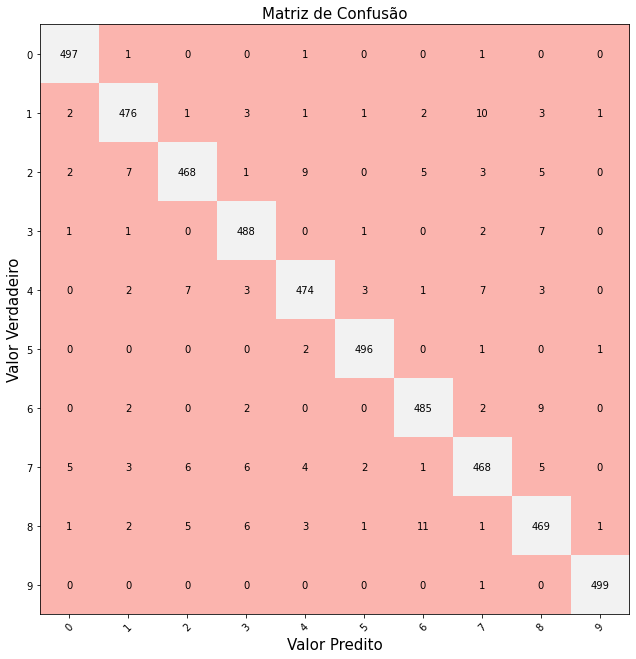

In [26]:
# Plot Matriz de Confusão
plt.figure(figsize=(9,9))
plt.imshow(confusion_matrix, interpolation='nearest', cmap='Pastel1')
plt.title('Matriz de Confusão', size = 15)
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Valor Verdadeiro', size = 15)
plt.xlabel('Valor Predito', size = 15)
width, height = confusion_matrix.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(confusion_matrix[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')